In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


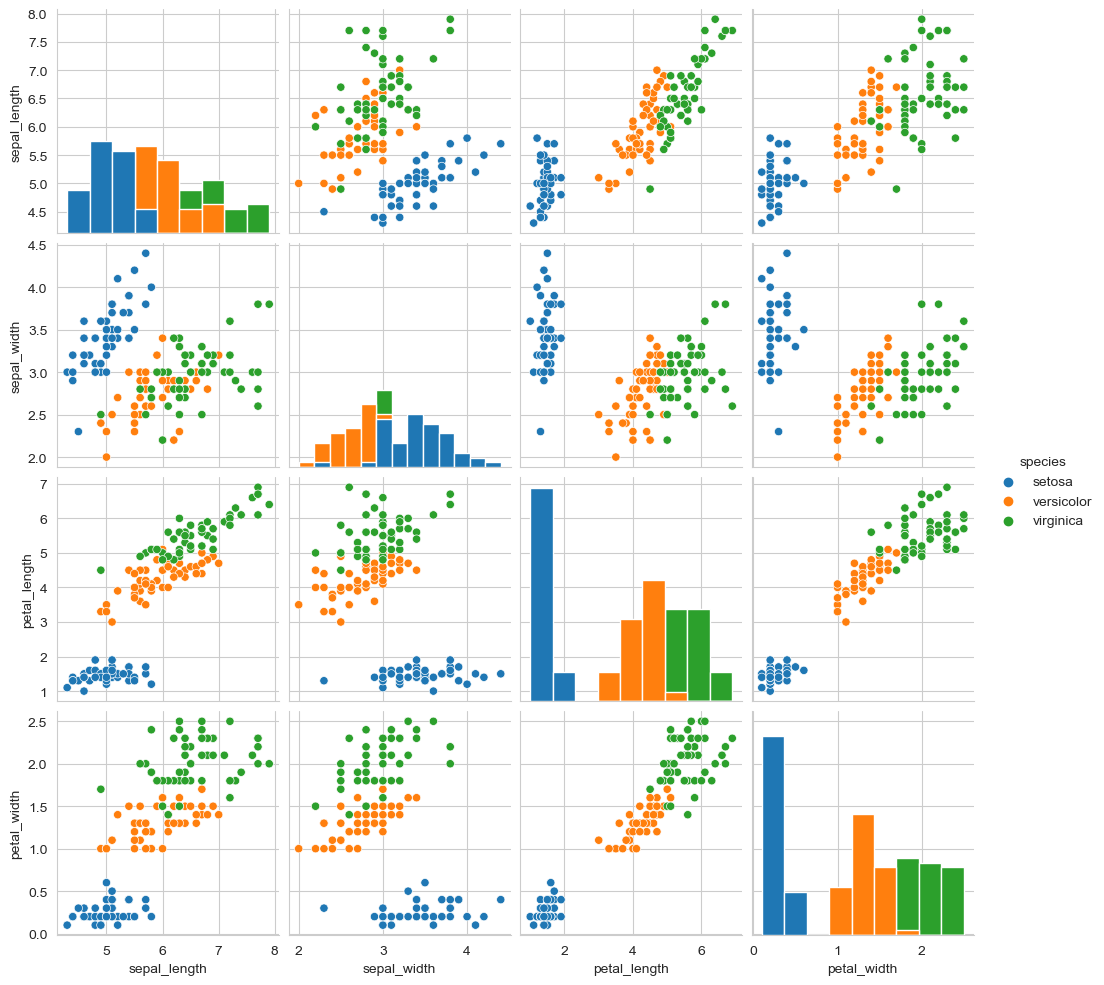

In [6]:
sns.pairplot(df,hue='species',diag_kind='hist',diag_kws={'alpha':1})

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

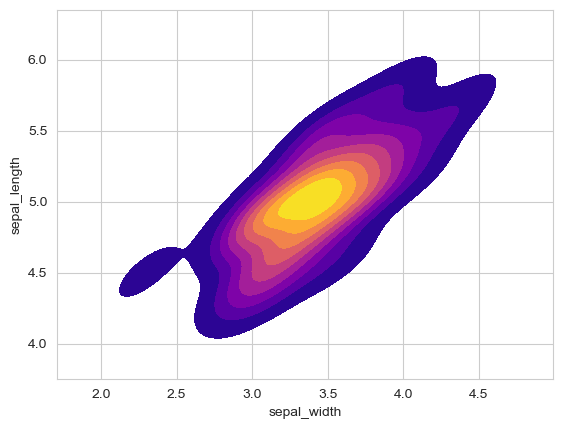

In [7]:
sns.kdeplot(data=df[df["species"]=='setosa'],x='sepal_width',y='sepal_length',fill=True,cmap='plasma')

In [8]:
X=df.drop(['species'],axis=1)

In [9]:
y=df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
support_vector_machine=SVC()
support_vector_machine.fit(X_train,y_train)
pred_1=support_vector_machine.predict(X_test)

In [18]:
print(classification_report(y_test,pred_1),confusion_matrix(y_test,pred_1),sep='\n')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [20]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
gs=GridSearchCV(SVC(),param_grid,verbose=3)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [21]:
pred_2=gs.predict(X_test)
print(classification_report(y_test,pred_2),confusion_matrix(y_test,pred_2),sep='\n')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
